# Métodos para encontrar raíces
Hay infinidad de problemas en física en los cuales se requiere encontrar las raíces de una ecuación (aquellos valores en los cuales la función vale cero), encontrar raíces de polinomios es relativamente fácil  (por el teorema fundamental del algebra) pero si hay funciones trascendentales entonces solo se pueden usar métodos numéricos, los métodos estudiados aquí son,

1. [El método gráfico: Introducción](#Introduccion).
2. [El método de la bisección](#El_metodo_de_la_biseccion).
3. [El método de punto fijo](#punto_fijo).
4. [El método de Newton-Raphson](#Newton-Raphson).
5. [Método de la secante](#Metodo_de_la_secante).
6. [Método de la posición falsa](#Metodo_de_la_posicion_falsa).
7. [Método de Steffensen](#Metodo_de_Steffensen).

Finalmente al final del cápitulo tenemos,

8. [Ejercicios](#Ejercicios).
9. [Material Complementario](#Material_complementario).

<!---
1) Algoritmo de la bisección    (2.1 The Bisection Method pag 48).  
2) Algoritmo del punto fijo      (2.2 Fixed-Point Iteration 56).<br>
3) Algoritmo de Newton-Raphson  (2.3 Newton’s Method and Its Extensions, pag 67).<br>
4) Algoritmo de la secante       (2.3 Newton’s Method and Its Extensions, pag 71).<br> 
5) Algoritmo de la regla falsa  (2.3 Newton’s Method and Its Extensions, pag 73.<br>
6) Algoritmo de Steffensen.
--->

<a id='Introduccion'></a>
## 1) El método gráfico: Introducción
Considere el siguiente problema de física: hay un gas radioactivo dentro de un recipiente que permite la migración de partículas fuera de él a una rata constate $v$ (por ejemplo por una fuga). Si al tiempo $t$ hay $N(t)$ partículas que decaen a una rata constate $\lambda$, entonces este gas es gobernado por la ecuación diferencial,
  $$\frac{dN(t)}{dt}= -\lambda N(t) - v,$$
la solución analítica a este problema es dada por 
  $$N(t)=N_0e^{-\lambda t}+\frac{v}{\lambda}(e^{-\lambda t}-1)$$
donde $N_0$ es el número inicial de partículas. Supongamos que $N_0=10000$ y que al tiempo $t=1\,$ ms el número de partículas se reduce a la mitad, $N=5000$, si la rata de migración es de $v=1$ partícula por ms ¿Cuál es la rata de decaimiento $\lambda$ de las partículas radioactivas? Remplazando en la ecuación anterior tenemos que,
  $$5000=10000e^{-\lambda}+\frac{1}{\lambda}(e^{-\lambda}-1)$$
Esta define una ecuación trascendental sin solución analítica posible ¿Cómo resolver entonces el problema?
El siguiente código muestra el gráfico de 

$$f(\lambda)=10000e^{-\lambda}+\frac{1}{\lambda}(e^{-\lambda}-1) -5000$$

en el cual el valor de $\lambda$ se obtiene cuando la función corta el eje $x$, es decir $f(\lambda)=0$:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

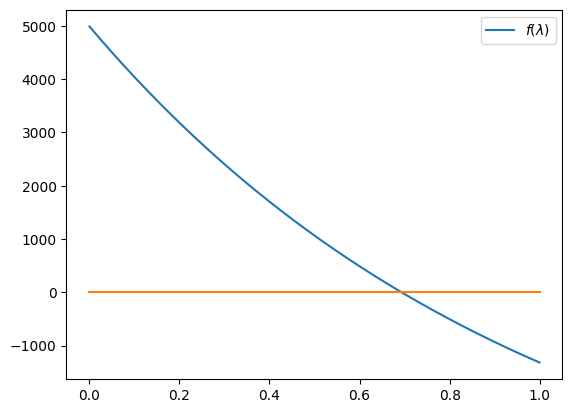

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# función decaimiento radioactivo en frasco con fuga (primer problema)
f = lambda x: 1e4*np.exp(-x) + 1/x*(np.exp(-x)-1) - 5000
x=np.arange(0.001,1, 0.001) # valores de lambda

plt.plot(x,f(x),label='$f(\lambda$)')    
plt.plot([0,1],[0,0]) # linea recta en cero.
plt.legend()          # para mostrar los labels. 

plt.show()

<a id='Ecuaciones_de_una_variable'></a>
### Ecuaciones de una variable 
La pregunta anterior define el problema de encontrar las raíces de una función de una variable que no es un polinomio. Por el teorema fundamental del algebra sabemos que todo polinomio de grado $n$ tiene a lo sumo, $n$ raíces reales o complejas, en este caso hay una solución analítica, pero en casos como el problema de la introducción la solución analítica no existe, a este tipo de ecuaciones se les conoce como trascendentales. Hay muchas clases de funciones trascendentales, por ejemplo:

   > a)  $f(x) =  x - \cos(x)$<br>
   > b)  $f(x) =  \tan(x) -x^2 + 2$<br>
   > c)  $f(x) =  0.10*\exp(x/5.0) + 5.0(\exp(x/5.0) - 1.2)$<br>

En estos casos la raíces solo se pueden encontrar de manera aproximada. Hay varias maneras de encontrar las raíces, la más fácil es graficando, por ejemplo,

   $$f(x) = 0 = x - \cos(x)$$   
   $$x = \cos(x)$$

entonces se gráfica $x$ y luego $\cos(x)$, el punto de intercesión de las gráficas da la raíz de ~0.73:

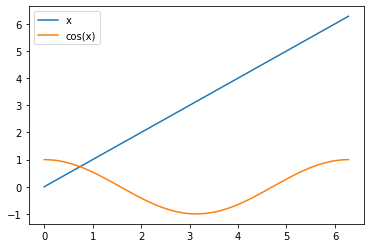

In [ ]:
# %pylab, # 
# %matplotlib inline
#%matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,2*np.pi,0.01)
plt.plot(x,x, label="x")       # grafico de x
plt.plot(x,np.cos(x),label='cos(x)') # grafico de cos(x)
plt.legend() # para mostrar los labels. 

plt.show()

Este método no es muy preciso, note que el espaciamiento en x es de ~0.1
pero usando el zoom de ventana gráfica podemos tener una primera aproximación de la raíz (o raíces del la función), así del gráfico podemos tener un primera aproximación con unas 2 o 3 cifras significativas.
Igualmente, para el caso del decaimiento radioactivo vemos que la raíz es cuando $f(\lambda)=0$, del primer gráfico vemos que $\lambda\approx 0.7$.

Par encontrar las raíces con mejor aproximación hay varios métodos:

<a id='El_metodo_de_la_biseccion'></a>
## 1) El método de la bisección
 Se basa en el teorema del valor intermedio que dice:
 
 Si $f$ pertence a C$[a,b]$ (funciones continuas en $[a,b]$) y $K$ es un número entre $f(a)$ y $f(b)$ entonces existe un  número $c$ en $(a,b)$ tal que $K = f(c)$. 

 El método consiste en seleccionar un intervalo $(a,b)$ que contenga la raíz,
 note que $f(a)*f(b)<0$.
 pasos:

 1) Se calcula el punto medio del intervalo y se calcula la función allí:
   
   $$p = a + (a-b)/2 = (a+b)/2$$
 
 2) Si $f(a)*f(p)>0$ entonces la raíz está en el intervalo $(p,b)$, cambiamos $a = p$.<br>
 Si $f(a)*f(p)<0$ entonces la raíz está en el intervalo $(a,p)$, cambiamos $b = p$.
 
 3) Se repiten los pasos hasta que cualquiera de estas condiciones se cumpla:

   * $|p_n - p_{n-1}| < eps$,     (error absoluto).
   
   * $|p_n - p_{n-1}|/|p_n|  < eps$, (error porcentual, tal vez el mejor criterio).

   * $|f(p_n)| < eps$.           

El siguiente gráfico muestra la convergencia para tres pasos

|<img src="Biseccion.png" alt="Drawing" style="width: 500px;"/>|
|:--:| 
| *Figura: Método de Bisección (figura libro de Burden)*|

En general se define $|\epsilon-\epsilon'|$ como el error absoluto y $|\epsilon-\epsilon'|/|\epsilon|$ es el error relativo, donde $\epsilon$ es el valor verdadero y $\epsilon'$ el valor aproximado, no obstante en los casos anteriores, se toma como valor verdadero a $p_n$ siendo este una mejor aproximación a $p$ que $p_{n-1}$. Con cualquiera de los tres criterios se puede encontrar problemas, así por ejemplo se sabe que si $f(p) = 0$ la raíz ya está encontrada, pero habrá funciones para las cuales $f(p_n) < eps$ y $|p_n - p| >> eps$, ósea $p$ está lejos de la raíz. 

 
El código del algoritmo de bisección en python es:

In [6]:
import numpy as np

# definimos el algoritmo de bisección
def Biseccion(f,a,b,eps):
   if (f(a)*f(b) > 0.0): 
     print("elija mejor el intervalo")
     return
   
   a1 = a                # valores iniciales a y b
   b1 = b                # se obtiene de la grafica 
   i = 0                 # contador de iteraciones
   while True:
     i=i+1
     p = (a1 + b1)*.5    # punto medio entre a y b
     print (i, p, f(p))  

     if (f(a1)*f(p) > 0.0): a1 = p 
     if (f(a1)*f(p) < 0.0): b1 = p

     if ( np.abs(f(p)) < eps ):break # condición de parada.

 **Ejemplo 1**: Encontremos la raiz de, $f(x)=\cos(x)-x$, en $[0,1]$:  

In [7]:
Biseccion(lambda x: np.cos(x) -x,0,1.0, 1.0e-10)

# note que la función se pudo definir como 

# def f1(x):
#    return cos(x)

# y luego usarla como:
# Bisección(f1 ,0,1.0, 1.0e-10)

1 0.5 0.37758256189037276
2 0.75 -0.018311131126179103
3 0.625 0.18596311950521793
4 0.6875 0.0853349461524715
5 0.71875 0.03387937241806649
6 0.734375 0.00787472545850132
7 0.7421875 -0.005195711743759213
8 0.73828125 0.001345149751805108
9 0.740234375 -0.001923872780897673
10 0.7392578125 -0.0002890091467900868
11 0.73876953125 0.0005281584336581657
12 0.739013671875 0.00011959667132188656
13 0.7391357421875 -8.470073137478717e-05
14 0.73907470703125 1.7449346639941687e-05
15 0.739105224609375 -3.362534821038654e-05
16 0.7390899658203125 -8.087914744714375e-06
17 0.7390823364257812 4.680737457851691e-06
18 0.7390861511230469 -1.7035832658995886e-06
19 0.7390842437744141 1.488578440400623e-06
20 0.7390851974487305 -1.0750207668497325e-07
21 0.7390847206115723 6.905382659017079e-07
22 0.7390849590301514 2.915181156470936e-07
23 0.7390850782394409 9.200802475461956e-08
24 0.7390851378440857 -7.747024688420368e-09
25 0.7390851080417633 4.213050031065535e-08
26 0.7390851229429245 1.719173

**Ejercicio**: Graficar y encontrar la raíz de $f(x)=\tan(x)-x^2$ en  $[1.55, 165]$. Por qué da un bucle infinito?

In [ ]:
# Biseccion(lambda x: np.tan(x) -x**2.0,1.55,1.65, 1.0e-10)
# IMPORTANTE: para parar el bucle, en Kernel selecionar interupt!

El error del método de bisección se puede calcular a partir de 
$$|p - p_n| = (b-a)/2^n$$
(para todo $n>=1$), lo que significa que, 
$$p_n = p + O(1/2^n).$$
La notación, $O(1/2^n)$, significa error de orden $1/2^n$.

Por último para que el método de Bisección funcione se debe garantizar que $f(a)f(b)<0$, aunque habrá casos para los que esto no se cumpla, por ejemplo en la función $f(x) =(x-2)^2$, el método de Bisección no funciona para ningún intervalo de $[a,b]$, pero si se puede usar el método de Punto fijo explicado a continuación.

<a id='punto_fijo'></a>
## 2) El método de punto fijo
Un punto fijo es un número para el cuál el valor de una función da el mismo número cuando la función es evaluada en él, en otras palabras:

### Definición
Para una función $g(x)$ dada un número $p$ es un punto fijo si, 

$$g(p) = p.$$

Se puede ver que si,  

$$f(x) = x - g(x)$$

y $p$ es un punto fijo de $g(x)$ entonces $p$ es un cero de $f(x)$ o $f(p) = 0$, i.e,

$$f(p)=0 \Longleftrightarrow p=g(p).$$

Para encontrar un punto fijo usamos la secuencia, 

$$p_n = g(p_{n-1}),\quad n=1,2,3...$$

La convergencia en tres pasos se puede ver en el siguiente gráfico, a) para una función decreciente y b) para una creciente en $[a,b]$:

|<img src="Punto_fijo_iteracion.png" alt="Drawing" style="width: 800px;"/>|
|:--:| 
| *Figura: Método de punto fijo (figura libro de Burden)*|
 
En el límite cuando $n\rightarrow \infty,\Rightarrow  p_n \rightarrow p$. 
La implementación es,

In [8]:
def Punto_Fijo(g, p, eps=1.0e-10,  Nmax=10000):
    '''
    2) Método de punto fijo p = g(p) en [a,b], con a < p < b

    Ejemplo:
      g = lambda x: np.cos(x) # Equiv a: def g(x): return np.cos(x) 
      Punto_Fijo(g , 1.0)                          # usando a
      Punto_Fijo(lambda x: np.cos(x),0.0, 1.0e-10) # usando b   
    '''
    
    p0 = p           # valor inicial
    i = 0            # contador de iteraciones
    while i<Nmax:
        i=i+1
        p = g(p0)    # punto fijo entre a y b
        print (i, p, np.abs(p - p0) ) 
        if ( np.abs(p - p0) < eps ): break # condición de parada.
        p0 = p
    return p

Ahora usemos el algoritmo para encontrar el punto fijo, $p=\cos(p)$, (en este caso $g(x)=\cos(x)$) para un $p_0=a=0$ y $p_0=b=1$ ($a,b$ son los valores usados en el método de bisección), como vemos, con $a$ toma 57 pasos y con $b$ 58 pasos en converger:

In [9]:
print ("Método punto fijo, usando a")
Punto_Fijo(lambda x: np.cos(x),0.0, 1.0e-10) # usando a

print ("Ahora usando b")
Punto_Fijo(lambda x: np.cos(x),1.0, 1.0e-10) # usando b

#def g(x):
#    return np.cos(x)
#Punto_Fijo(g,1.0) # usando b

Método punto fijo, usando a
1 1.0 1.0
2 0.5403023058681398 0.45969769413186023
3 0.8575532158463934 0.31725090997825367
4 0.6542897904977791 0.2032634253486143
5 0.7934803587425656 0.13919056824478648
6 0.7013687736227565 0.0921115851198091
7 0.7639596829006542 0.06259090927789768
8 0.7221024250267077 0.04185725787394645
9 0.7504177617637605 0.028315336737052776
10 0.7314040424225098 0.019013719341250734
11 0.7442373549005569 0.012833312478047088
12 0.7356047404363474 0.008632614464209487
13 0.7414250866101092 0.0058203461737618145
14 0.7375068905132428 0.003918196096866389
15 0.7401473355678757 0.0026404450546329006
16 0.7383692041223232 0.0017781314455525
17 0.7395672022122561 0.0011979980899329279
18 0.7387603198742113 0.0008068823380448231
19 0.7393038923969059 0.0005435725226945465
20 0.7389377567153445 0.0003661356815614081
21 0.7391843997714936 0.00024664305614918725
22 0.7390182624274122 0.00016613734408144065
23 0.7391301765296711 0.00011191410225885878
24 0.7390547907469174 7

0.7390851332451103

In [10]:
# Imprimir ayuda de la función
help(Punto_Fijo)

Help on function Punto_Fijo in module __main__:

Punto_Fijo(g, p, eps=1e-10, Nmax=10000)
    2) Método de punto fijo p = g(p) en [a,b], con a < p < b
    
    Ejemplo:
      g = lambda x: np.cos(x) # Equiv a: def g(x): return np.cos(x) 
      Punto_Fijo(g , 1.0)                          # usando a
      Punto_Fijo(lambda x: np.cos(x),0.0, 1.0e-10) # usando b



No todas las funciones $x=g(x)$ convergen a un punto fijo $p$. Veamos el siguiente caso, considere que se desea encontrar los ceros de la función $f(x)=x^4+2x^2-x-3$, de la definición vemos que $g_1(x)=x-f(x)=-x^4-2x^2+2x+3$ (o también $x=g_1(x)=x^4+2x^2-3$, pues $f(x)=0$), que diverge:

In [ ]:
Punto_Fijo(lambda x: x**4+2*x**2-3,1., 1.0e-5) 
#Punto_Fijo(lambda x: -x**4-2*x**2+2*x+3,1., 1.0e-5) 

1 0.0 1.0
2 -3.0 3.0
3 96.0 99.0
4 84953085.0 84952989.0
5 5.208547368149292e+31 5.208547368149292e+31
6 7.359807792059969e+126 7.359807792059969e+126


OverflowError: (34, 'Result too large')

¿Por qué diverge? la justificación es dada por el siguiente teorema:

### Teorema del punto fijo

Sea $g(x)$ que pertenece a C$[a,b]$ (funciones continuas en $[a,b]$) tal que $g(x)$ 
pertence $[a,b]$ para todo $x$ en $[a,b]$, además suponga que existe $g'(x)$ en $(a,b)$
tal que una constante $0<k<1$ existe y

$$|g'(x)| \le k   \quad    \hbox{para todo } x \hbox{ en } (a,b),$$

entonces para todo número $p_0$ en $[a,b]$ la secuencia definida por 

$$p_n = g(p_{n-1}),\quad n\ge 1,$$

converge a un unico punto $p$ en $[a,b]$.

Note en la siguiente grafica que $a \leq g(x)\leq b$ en $[a,b]$ y un punto fijo en el interior:

|<img src="Punto_fijo_condiciones.png" alt="Drawing" style="width: 500px;"/>
|:--:| 
| *Figura: Condiciones de convergencia en el método de Punto_fijo (figura libro de Burden)*|

En este caso el error esta dado por el corolario:

$$ | p_n − p| \leq k^n \max\{ p_0 − a, b − p_0\}$$

o también

$$| p_n − p| \leq \frac{k^n}{(1 − k)}| p_1 − p_0|\quad n=1,2,3...$$

Por manipulación algebraica de $f(x)=x^4+2x^2-x-3$ se pueden construir otras alternativas para $g(x)$:

\begin{align}
g_2(x)=&\,(3+x-2x^2)^{1/4}\\
g_3(x)=&\,( (x + 3)/(x^2 + 2) )^{1/2}\\
g_4(x)=&\,((x + 3 -x^4)/2)^{1/2}
\end{align}
 
A continuación la implementación en python, por favor verificar la convergencia para cada caso: 

In [ ]:
Punto_Fijo(lambda x:(3+x-2*x**2.)**(1/4.),1., 1.0e-5)       # g_2(p)  P = 1.12412721208
Punto_Fijo(lambda x:((x + 3)/(x**2 + 2))**(1/2.),1., 1.0e-5)# g_3(p)  P = 1.12412111111
#Punto_Fijo(lambda x:((x + 3 -x**4)/2)**(1/2.),1., 1.0e-5)   # g_4(p)   NO CONVERGE!

En $g_1(x)$ vemos que no converge porque $|g'(1)|> 1$, y el teorema no garantiza convergencia.

En general se puede resumir el teorema en estas tres condiciones (verificar):

  1) Continuidad en $[a,b]$ con $a<p_0<b$. <br>
  2) $a < g(p_0) < b.$<br>
  3) $|g'(p_0)|< 1.$

es decir, hay convergencia a una raíz si se cumple esto.

**Ejercicio**: encontrar punto fijos (y las raíces) de la función, 

$$f(x)=\cos(x) + \log(x)-x + 10.$$ 

In [ ]:
%matplotlib inline
f = lambda x: np.cos(x) + np.log(x)-x + 10
x = np.arange(1e-6,15,1e-6)# intervalo [1e-6, 15]

# 1) ------ x1,x2 por grafico:
plt.plot(x,f(x))
plt.plot([0,15],[0,0])

# 2) -------x1 por Bisección
Biseccion(f,1e-5,.1, 1.0e-10)
# Punto_Fijo(lambda x: np.cos(x) + np.log(x) + 10,1e-3, 1.0e-5)

# 3) -------x1 por punto fijo 
Punto_Fijo(lambda x: np.exp(-np.cos(x) + x - 10),1, 1.0e-5) 

### Orden de convergencia

 Suponga que la secuencia $\{p_n\}_0^\infty$ con $n=0,1,2,...$ converge a $p$, entonces si
 
 $$\frac{|p_{n+1} - p|}{| p_n − p|^\alpha} = \lambda,\quad\hbox{ para }\quad n=1,2,...$$

 si $\alpha = 1$ la convergencia es lineal y si $\alpha = 2$ es cuadrática.
 los métodos de bisección y de punto fijo tienen convergencia 
 lineal, mientras los métodos de Newton y secante tienen convergencia
 cuadrática.


### Serie de Taylor y polinomio de Taylor
Suponga que $f \in C^n[a, b]$, que $f^{(n+1)}$ existe en $[a,b]$, y $x_0 \in[a, b]$. 
Entonces para cada $x$ ∈ $[a, b]$, existe un número $\xi(x)$ entre $x_0$ and $x$ tal que:

$$f(x) = P_n(x) + R_n(x)$$

donde

$$P_n(x) = f(x_0) + f'(x_0)(x − x_0) + \frac{f''(x_0)}{2!}(x − x_0)^2 +\cdots+\frac{f^{(n)}(x_0)}{n!}(x − x_0)^n$$

y 

$$R_n(x) = \frac{f^{(n+1)}(\xi(x))}{(n + 1)!}(x − x_0)^{(n+1)}$$

$P_n(x)$  es el polinomio de Taylor y $R_n(x)$ el residuo.
La serie se obtiene si se suma hasta infinito.

### Nota sobre estabilidad de puntos fijos
Los puntos fijos tienen infidad de aplicaciones en física y matemáticas,
miremos la estabilidad de un punto fijo $p=g(p)$, tal que $p_{n+1}=g(p_n)$, para esto consideremos un pequeño desplazamiento, $\delta p_n=p_n-p$, y por expansión de taylor,

$$p + \delta p_{n+1}=g(p+\delta p_n) =g(p) +g'(p)\delta p_n+ ...$$

lo cual da,

$$
\delta p_{n+1}= g'(p)\delta p_n + ...
$$

esta fórmula define la estabilidad, miremos:

1. Si $|g'(p)|<1$, significa que $\delta p_{n+1}$ es menor que $\delta p_{n}$ y por lo tanto $p$ es estable.

2. Si $|g'(p)|>1$, significa que $\delta p_{n+1}$ es mayor que $\delta p_{n}$ y crece con cada iteración, por lo tanto $p$ es inestable.

3. Si $|g'(p)|=1$, entonces hasta el primer orden, no se puede definir la estabilidad.

La estabilidad tiene multiples aplicaciones en problemas de dinámica no lineal, [estabilidad de orbitas](http://people.uleth.ca/~roussel/nld/stability_maps.pdf), [bifurcaciones](https://www.aglarick.com/2020/03/05/diagrama-de-bifurcacion/), etc.

**Tarea**: a) Para la función, $f(x) = x^3 + 4x^2 − 10 = 0$ graficar la función, en encontrar la raíz en el intervalo $[1, 2]$ por bisección. Respuesta: $p = 1.365230013$ con 13 pasos. b) encontrar el punto fijo y las funciones $g(x)$ (ver Burden pag 61 para la solución). 

**Tarea**: Encontrar el punto fijo de $g(x)=\,((3x^4+2x^2+3)/(x^4+4x-1))^{1/2}$ para $p_0=1$. Respuesta: $p = 1.502022778548$ en 8 pasos.

**Tarea**: demostrar que las anteriores funciones $g_2, g_3$ y $g_4$, provienen de $f(x).$

**Tarea**: Encontrar los valores de $x$ que satisfacen la ecuación, $\cos(x) + \log(x)= x -10$, con el método de bisección y el método de punto fijo (sugerencia, primero construya $f(x)=0$ y grafique para saber que intervalo usar). Respuesta $x_1=1.6701\times10^{-5}$, y $x_2=13.3190$.

**Tarea**: Encuentre todos los ceros en el intervalo $[0,7]$ de la función, $f(t)=1/2+\cos(t)+\cos(2t−1/2)/2.$

<a id='Newton-Raphson'></a>
## 4) Método de Newton-Raphson
Considere el polinomio de Taylor asta el grado dos,

$$f(p) = f(p_0) + (p − p_0)f'(p_0) + \frac{( p − p_0)^2}{2}f''(\xi(p)),$$

como $p$ es raíz entonces $f(p)=0$, al despejar encontramos que,

$$p=p_0-\frac{f(p_0)}{f'(p_0)},$$

con esta ecuación se puede definir la secuencia,

$$p_n=p_{n-1}-\frac{f(p_{n-1})}{f'(p_{n-1})},$$

que converge a la raíz $p$, esto está garantizado por el siguiente teorema:

**Teorema**: sea $f(x)$ que pertenece $C^2[a,b]$, si $p$ pertenece a $(a,b)$ y es tal que $f(p) = 0$ y $f'(p) \neq 0$, entonces existe un $\delta > 0$ tal que el método de Newton-Raphson genera la secuencia $\{p_n\}_0^\infty$ que  converge a $p$ para cualquier aproximación inicial $p_0$ que pertenece al intervalo $[p - \delta,p + \delta]$.

En la siguiente gráfica el método de Newton-Raphson para dos pasos.

|<img src="Newton_method.png" alt="Drawing" style="width: 500px;"/>|
|:--:| 
| *Figura: Método de Newton-Raphson para dos pasos (figura libro de Burden)*|

La implementación del código en python es:

In [12]:
import numpy as np

def Newton_Raphson(f,Df,p0,eps=1e-8,Nmax=100):
   
   i=1
   while i<Nmax:
   #while True: # para con los break de abajo
      p = p0 -f(p0)/Df(p0) 
      print (i, p, f(p))  

      if ( np.abs(p - p0) < eps ): break # condición de parada.
      #if ( np.abs((p - p0)/p) < eps ): break
      #if ( np.abs(f(p)) < eps ): break
      i=i+1   
      p0 = p
      
      #if (i == Nmax): print ("el método falló")
   return p         

In [15]:
Newton_Raphson(lambda x: np.cos(x) -x ,lambda x: -np.sin(x) -1,np.pi/4.,1.e-10)
# Resultado 0.739085133215

1 0.7395361335152383 -0.000754874682502682
2 0.7390851781060102 -7.512986643920527e-08
3 0.7390851332151611 -7.771561172376096e-16
4 0.7390851332151607 0.0


0.7390851332151607

Para que el método de Newton-Raphson funcione se debe garantizar que $f'(p) \neq 0$, por ejemplo la función $f(x) =(x-2)^2 -2$, tendrá problemas para converger a la raiz si $p_0=2$, pues en este caso $f'(2)=0$ y el método Newton-Raphson es incapaz de decidir a cual de las dos raices converger (ver intesección de lineas punteadas con eje $x$ en el siguiente gráfico), no obtante si se hace una pequeña variación si converge (por ejemplo, trate $1.999$). En general se debe evitar que hayan máximos o mínimos en la trayectoria entre $p_0$ y $p$, pues $f'(p_n) = 0$ para estos puntos extremos. 

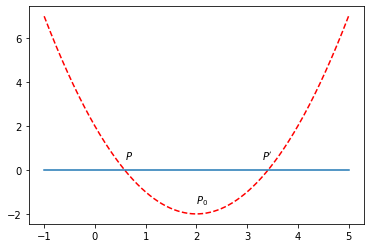

In [ ]:
# Casos en los que falla el método de Newton
import matplotlib.pyplot as plt

x = np.linspace(-1,5,10000)
y = (x-2)**2 -2
plt.plot(x,y, 'r--')
plt.plot([-1,5],[0,0])

plt.text(2,-1.5,r"$P_0$")
plt.text(0.6,.5,r"$P$")
plt.text(3.3,.5,r"$P'$")
plt.show()

In [ ]:
# Verifique que da error porque f'(p) = 0
#Newton_Raphson(lambda x: (x-2)**2 -2,lambda x: 2*(x-2),2,1.e-18) # trate con p0=1.999 converge?

**Ejercicio**: compare al método de punto fijo y al de bisección para el mismo $p_0 = \pi/4.$ 

El método de Newton-Raphson tiene convergencia cuadrática, lo cual lo hace muchísimo más rápido que los métodos de bisección y punto fijo que son de convergencia lineal, pero exige conocer la derivada de $f(x)$. En algunos casos calcular la derivada es engorroso, una alternativa es usar una aproximación de la derivada, es decir remplazar $f'(x)$ por,

$$f'(x)\approx\frac{f(x+h)-f(x)}{h},$$

o aún mejor, usar diferencia centrada pues tiene menor error,

$$f'(x)\approx\frac{f(x+h)-f(x-h)}{2h},$$


implementación en python:

In [14]:
# El método de Newton es poderoso pero se requiere conocer la derivada analítica que
# en algunos casos es engorrosa de calcular, una forma de evitar el problema es 
# calcular la derivada de forma numérica:
def Newton_Raphson2(f,p0,h=1e-5,eps=1e-8,Nmax=100):

   i=1
   while i<Nmax:
      Df = (f(p0+h)-f(p0-h))/(2*h) # Derivada numerica.
      p = p0 -f(p0)/Df 
      print (i, p, f(p))  

      if ( np.abs(p - p0) < eps ): break # condición de parada.

      i=i+1   
      p0 = p
      
      if (i == Nmax): print ("el método fallo")
   return p

Newton_Raphson2(lambda x: np.cos(x) -x,np.pi/4.,1.0e-5, 1.e-10)

1 0.7395361335147409 -0.0007548746816701257
2 0.7390851781060045 -7.512985700230956e-08
3 0.7390851332151611 -7.771561172376096e-16
4 0.7390851332151607 0.0


0.7390851332151607

<a id='Metodo_de_la_secante'></a>
## 6) Método de la secante
El método anterior aunque evita el problema de la derivada analítica, tiene el problema de que
el $h$ es constante. En el método de la secante se remplaza la derivada por la aproximación,

$$f'(p_{n-1}) \approx \frac{f(p_{n-1}) - f(p_{n-2})}{p_{n-1} - p_{n-2}}.$$
 
 note que en este caso $h$ es función de $n$, o $h = p_{n-1} - p_{n-2}$, por lo tanto a medida que 
 el algoritmo converge, $h$ se hace más pequeño.
 Remplazando en la fórmula de Newton-Raphson da,
 
$$p_n = p_{n-1} - \frac{f(p_{n-1})(p_{n-1} - p_{n-2})}{f(p_{n-1}) - f(p_{n-2})}\quad \hbox{ para }\quad n >= 2.$$

In [ ]:
def  Secante(f,p0,p1,eps=1e-8,Nmax=100):

   q0 = f(p0)
   q1 = f(p1)
   i = 2
   while i<Nmax:
      p = p1 - q1*(p1 - p0)/(q1 - q0)
      print (i, p, f(p))  
 
      if ( np.abs(p - p1) < eps ): break # condición de parada.
      i = i + 1

      p0 = p1
      q0 = q1
      p1 = p
      q1 = f(p)
      
      if (i == Nmax): print ("el método fallo")
   return p
# usamos p0 = pi/4 y p1 = 0.5
Secante(lambda x: np.cos(x) -x , 0.5, np.pi/4., 1.e-10)

2 0.7363841388365822 0.0045177185221702
3 0.7390581392138897 4.5177215963754236e-05
4 0.7390851493372764 -2.6982167056210926e-08
5 0.7390851332150645 1.6087131626818518e-13
6 0.7390851332151607 0.0


0.7390851332151607

**Ejercicio**: 
trate la versión numérica con h = 1.0e-5, 1.0e-3, 1.0e-2, 1.0e-1 y 
compare con los métodos de la secante y Newton.

|<img src="Secant_method.png" alt="Drawing" style="width: 700px;"/>|
|:--:| 
| *Figura: Convergencia de Métodos de la secante y de la posición falsa para dos pasos (figura libro de Burden)*|

<a id='Metodo_de_la_posición_falsa'></a>
# 6) Método de la posición falsa
Es conocido también como *regula falsi*, y genera aproximaciones de misma
manera que el método de la secante, pero incluye un test para asegurar que
la raíz está siempre entre los corchetes de las sucesivas iteraciones
igual que en el método de bisección. Más exactamente considere dos puntos $p_0$ y $p_1$, entonces:

  1) Si $f(p_0)f(p_1) < 0$ hay al menos una raíz entre $p_0$ y $p_1$, entonces $p_2$ se elige como el intercepto de la linea que une los puntos $( p_0, f(p_0))$ y $( p_1, f(p_1))$ con el eje $x$, de ahí el nombre de método de la secante.<br> 
    
  2) Luego, si $f(p_2)f(p_1)<0$ entonces $p$ está entre $p_1$ y $p_2$, se elige $p_3$ como el intercepto en el eje $x$ de la  linea que une los puntos $( p_1, f(p_1))$ y $( p_2, f(p_2))$.<br>
  
  3) Si no (es decir $f(p_2)f(p_1)>0$), entonces se elige $p_3$ como el intercepto con eje $x$ de la linea que une los puntos $( p_0, f(p_0))$ y $( p_2, f(p_2))$ y se intercambian los indices $p_0$ y $p_1$.  Finalmente el ciclo se repite para $p_4$, etc.
  
El método converge más lento que el método de Newton y el de la secante, pero es más 
rápido que el de bisección y a diferencia del método de la secante (y Newton), este nunca diverge, implementación:

In [ ]:
def  Regula_falsi(f,p0,p1,eps=1e-8,Nmax=100):

   q0 = f(p0)
   q1 = f(p1)
   i = 2
   while i<Nmax:
      p = p1 - q1*(p1 - p0)/(q1 - q0)
      print (i, p)  
 
      if ( np.abs(p - p1) < eps ): break # condición de parada.
      i = i + 1

      q = f(p)
      
      if (q*q1<0.0):
         p0 = p1
         q0 = q1
      
      p1 = p
      q1 = q
      
      if (i == Nmax): print ("el método falló")
   return p
        
# usamos p0 = pi/4 y p1 = 0.5
Regula_falsi(lambda x: np.cos(x) -x , 0.5, np.pi/4., 1.e-10)

2 0.7363841388365822
3 0.7390581392138897
4 0.7390848638147098
5 0.7390851305265789
6 0.7390851331883289
7 0.7390851332148929


0.7390851332148929

<a id='Metodo_de_Steffensen'></a>
## 7) Método de Steffensen
El método de Steffensen es una variante del método de punto fijo que es acelerado mediante el uso del método de Aiken:


### Aceleración de series de convergencia lineal (Aitken) 

El método Aitken dice que si una secuencia $\{p_n\}_0^\infty$ es de convergencia lineal, esta se puede remplazar por la secuencia $\{p_n'\}_0^\infty$ generada por,
 
$$\boxed{p_n' = p_n − \frac{(p_{n+1} - p_n)^2}{p_{n+2} - 2p_{n+1} + p_n}},$$

la cual converge más rápido que la secuencia original. Esta técnica se puede aplicar a cualquier serie con convergencia lineal. 

La dedución parte del hecho que $p$ converge de manera lineal, así,

$$
\frac {p_{n+1} − p}{p_n − p} \approx \frac{p_{n+2} − p}{p_{n+1} − p},
$$

entonces,

$$( p_{n+1} − p)^2 \approx ( p_{n+2} − p)( p_n − p),$$

despues de algún algebra (ver Burden pag 87) se llega a que, 

$$p\rightarrow p_n' \approx  p_n − \frac{(p_{n+1} - p_n)^2}{p_{n+2} - 2p_{n+1} + p_n}.$$


Si se usa Aitken con el método de punto fijo se obtiene el método de Steffensen, i.e.,
al aplicar el método de Aitken al método de punto fijo (que es lineal)
se obtiene un nuevo método acelerado con convergencia cuadrática siempre y cuando $g'(p)\neq 1$. 
Como es lógico, el método de Steffensen se usa para encontrar la solución de la ecuación
$p = g(p)$ dada la aproximación inicial $p_0$. 
Veamos la implementación:

In [ ]:
def  Steffensen(g,p0,eps=1e-8,Nmax=100):

   i = 1
   while i<Nmax:
      p1 = g(p0)
      p2 = g(p1)

      p = p0 - (p1 - p0)**2./(p2-2.*p1 + p0)
      print (i, p)  
 
      if ( np.abs(p - p0) < eps ): break # condición de parada.
      i = i + 1

      p0 = p
      
      if (i == Nmax): print ("el método falló")
   return p 
# Usamos p0 = pi/4 y p0 = 0.5
Steffensen(lambda x: np.cos(x), 0.5, 1.e-10)
#Steffensen(lambda x: np.cos(x), np.pi/4., 1.e-10) # da problema division por cero!

1 0.7313851863825818
2 0.7390763403695223
3 0.7390851332036612
4 0.7390851332151607


0.7390851332151607

<a id='Ejercicios'></a>
## Ejercicios: Aplicaciones de física

**Tarea**: En astronomía la posición de un planeta en su órbita es dada por la ecuación de Kepler que es definida por,

$$M=E-e\sin(E)$$

donde $E$ es la anomalía excéntrica, $M$ es la anomalía media y la excentricidad de la órbita $e$.<br> 
a) Suponga que un planeta se mueve con una órbita elíptica con excentricidad $e=10^{-5}$ y anomalía $M=\pi/6$.<br> 
b) Grafique $E$ para $M=\pi/6$ y $10^{-5}<e \leq 2.0$ (use pasos de $\Delta e=0.001$), verifique en que situaciones puede usar punto fijo y en cuales Newton-raphson.<br>
c) Grafique $E$ para $e=10^{-5}$ y $0\leq M\leq \pi$.

<!---
ver
http://www.csun.edu/~hcmth017/master/node16.html
--->


**Tarea**: En hidráulica de conducciones existe una ecuación trascendente que permite obtener el máximo caudal transportable por un tubo circular para una pendiente fija, obteniendo el calado óptimo para el radio hidráulico máximo. Para ello se utiliza la solución numérica de la ecuación trascendente

$$\alpha =\tan(\alpha)$$

Esta ecuación admite infinitas soluciones, la menor solución estrictamente positiva se da para el valor $\alpha =4,493409$ (que usualmente se interpreta como el valor en radianes de un ángulo). Otras soluciones son: $\alpha =7.7252, 10.9042, 14.0661, 17.2208,\dots$.

Para grandes valores de n existen soluciones cercanas a $(2n+1)\pi /2$. Además si $\alpha =\beta$ es solución entonces $\alpha =-\beta$ también es solución. Todas las soluciones son de multiplicidad simple excepto $\alpha =0$ que es de multiplicidad 2.

**Tarea**: la [función W de Lambert](https://es.wikipedia.org/wiki/Funci%C3%B3n_W_de_Lambert) (en honor a Johann Heinrich Lambert), tiene aplicaciones en termodinámica tales como el cálculo de la entropía, se define como la función $W(z)$ inversa tal que,

$$
z=W(z)e^{W(z)},
$$

para todo número complejo $z$, es decir:

$$
z=Ye^{Y}\;\Longleftrightarrow \;Y=W(z).
$$

Implemente la función W de Lambert en python mediante el método de Newton-Raphson para todo valor de $z$ (use como aproximación inicial $p_0=log(z)$. Tenga en cuenta que $W(x)$ es real para $x\geq -1/e, W(0)=0,$ además $W(1/e)=-1$ y $W(1)=0.567143...$ ).

**Tarea**: En general, la ecuación trascendente

$$e^{cx}=ax+b$$

(o su equivalente $cx=\ln(ax+b)$) tiene una única solución que puede expresarse en términos de la función W de Lambert:

$$ x =-{\frac {1}{c}}W\left(-{\frac {c}{a}}e^{-{\frac {bc}{a}}}\right)-{\frac {b}{a}}.$$

De forma más general,

$$p^{ax+b}=cx+d \quad\Longleftrightarrow\quad x=-{\frac {W\left(-{\frac {a\ln p}{c}}\,p^{b-{\frac {ad}{c}}}\right)}{a\ln p}}-{\frac {d}{c}}$$ 

donde $p>0\land c,d\neq 0$.

Comparar la solución analítica al método de Newton-Raphson. Ayuda: en python la [función W de lambert](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.lambertw.html) es dada por, 
```python
from scipy.special import lambertw

x = lambertw(z)
```
    

**Tarea**: Se planea hacer una antena con una  barra de longitud $l$, la cual está localizada a lo largo del eje $x$ y tiene una carga neta $Q$. Se puede demostrar que el potencial a un punto con coordenadas $P = (0,d)$ es dado por 

$$V=  \frac{kQ}{l} \ln⁡\left(\frac{l+\sqrt{l^2+d^2}}{d}\right)$$

1. Grafique la función $f(l)=0$ ¿cuántas raíces hay? (use `l = np.arange(0, 2.0, 0.001))`. 
De un valor aproximado a partir de la gráfica.
2. Usando el método de la Secante calcule la longitud de la barra que produce un potencial de $0.5$ V  a una distancia en $d=0.3$ m  (use $kQ=1$ ).
3. Usando un p_o de su elección, ¿Cuántas iteraciones son necesarias para hallar la frecuencia con un error menor que $10^{-8}$?
4. Elija un intervalo $(a,b)$ y corrobore su resultado usando el método de bisección ¿Cuántas iteraciones son necesarias para hallar la longitud con un error menor que $10^{-5}$ ?

<!---
Solución: 
$$l=  \frac{kQ}{V} \ln⁡\left(\frac{l+\sqrt{l^2+d^2}}{d}\right)$$
que define la ecuación de punto fijo $l=g(l)$ o también el problema de raíces,

$$f(l) = l - \frac{kQ}{V} \ln⁡\left(\frac{l+\sqrt{l^2+d^2}}{d}\right)=0,$$

[see](http://hyperphysics.phy-astr.gsu.edu/hbase/electric/potlin.html) or
[see met doc, page 31](http://web.mit.edu/8.02t/www/802TEAL3D/visualizations/coursenotes/modules/guide03.pdf)
--->

**Tarea**: Es sabido que en el movimiento amortiguado la energía disminuye con el tiempo debido a una fuerza disipativa proporcional a la velocidad, la constante de proporcionalidad es $b= 0.1$ kg/s, pero si se introduce una fuerza restauradora $F_0=0.4$ N, el movimiento vuelve a ser armónico simple y se puede mostrar que es gobernado por la ecuación:

$$x=\frac{F_0/m}{\sqrt{(\omega^2-\omega_0^2)^2+\left(\frac{b\omega}{m}\right)^2 }} \cos⁡(\omega t+\delta)$$

1. Construya y grafique la función $f(\omega)$ ¿cuántas raíces hay? Considere $t=1$ s, $x=0.1$ m, $m=0.2$ kg, $\delta=0.0$ y  $\omega_0=2.4$ Hz (use `ω = np.arange(0, 20, 0.001)`). 
2. Con el método de Newton (puede usar derivada numérica) calcule la frecuencia $\omega$. 
3. Usando un $p_0$ de su elección, ¿Cuántas iteraciones son necesarias para hallar la frecuencia con un error menor que $10^{-8}$?
4. Elija un intervalo $(a,b)$ y corrobore su resultado por el método de bisección ¿Cuántas iteraciones son necesarias para hallar la frecuencia con un error menor que $10^{-5}$?


**Tarea**: Considere un resorte con un extremo pegado a una pared y al otro extremo se le aplica una fuerza constante de 2N, si la resorte opone una fuerza de resistencia a la deformación dada por $F=k(x)x=exp(x)x$, a) calcule el valor para el cual las fuerzas se equilibran. b) considere que el resorte tiene un peso $W=1 Kg$ , calcule las distancias $(x,y)$ de equilibrio.

**Tarea**: La ecuación Shockley describe el comportamiento de un diodo conectado a un generador, si la corriente en el diodo es dada por $I = I_0(\exp (V/V_T) - 1)$ (donde $V_T=K_BT/q_e$ es el voltage térmico, $T$ la temperatura, $K_B$ es la constante de Boltzmann y $e$ la carga del electrón), el voltaje es $V = v - IR$ (pues el generador tiene una resistencia interna $R$ y un voltage nominal $v$), además como $I = (v - V)/R$ se obtiene la relación,

$$(v - V) = R I_0 (\exp(V/V_T) - 1).$$

a) Encuentre los valores $(I,V)$ para $R=2k\Omega$, $RI_0= 0.1$ fA, $v= 1$V y $K_B/q_e = 8.6173333\times10^{-5}$ V/K (pruebe otros valores).<br> 
b) Grafique $(I(T),V(T))$ para $0<T<100$ K.


<!---
1) In electricity Shockley diode equation describes a diode  connected to a generator.
The diode lets current i = i_0 (exp (V / V0) - 1).  (Note: In introductory courses you probably see that a diode lets i=0 for V < V0 and whatever current for V = V0.)    We also know that the voltage is V = v - ri (the generator has internal resistance r, so that the voltage is a bit smaller than nominal voltage v).  Thus i = (v - V) / r so that we get the equation:

$$(v - V) = r i_0 (\exp(V/V0) - 1). $$ 
see also: 
https://qucs.github.io/tech/node16.html
https://www.ele.uri.edu/courses/ele338/summer2020/DiodeModels.pdf
--->        
 **Tarea**:  El valor de la magnetización promedio en un imán según la teoría del campo medio es dada por la ecuación, 
 
$$M=\tanh((JM+B)/K_BT),$$

donde $J$ es una constate de acoplamiento, $B$ es un campo magnetico externo aplicado al imán y $T$ la temperatura y $k$ la constante de Boltzmann. <br>
a) Para $B=0$ graficar $M/J$ como función de la temperatura para ver las transiciones de face, ¿a qué valor ocurre la temperatura crítica de curie, es decir aquel valor $T_c$ para el cual $M(T_c)=0.0$? asuma por simplicidad $K_B=1$.<br>
b) Repetir el gráfico para diferentes valores positivos y negativos de $B$.

<!--- 
**Tarea**:  The expected spin using mean field theory in the Ising model. For spin σ between negative one and one, external magnetic field B, spin coupling J, and temperature T
, we have:
⟨σ⟩=tanh((J⟨σ⟩+B)/kT)

If we plot this for different temperatures, you'll see exactly how the phase transition happens. It has one solution for high temperatures but three (with one solution unstable) for low temperatures.

**Tarea**: Considere la ecuación que describe el comportamiento de las ondas en la cuerda de una guitarra con entremos fijados a $x=0$ y $x=L$,

$$\sin(kx)=\sin(k(L−x)),$$

la soluciones  obvias son $x=0$ y $x=L$, pero existe otras, encuentre todos los posibles valores de $k$ que satisfacen esta ecuación. 


**Tarea**:  sin(kx1)=sin(k(L−x1))(1).
The first sin is a solution turning into zero at x=0, the second one turns into zero at x=L. This is a solution for an elastic guitare string fixed at x=0 and x=L. At x=x1 we require continuity of the total solution; thus the equation (1). We must find the possible values of k_n to satisfy this equation.
--->
**Tarea**: la resonancia magnética es una técnica muy usada en aplicaciones biomédicas: para producir las imágenes a un punto se usa un solenoide de radio $a$ y longitud $l$ que produce una densidad de flujo que depende del número de vueltas $N$, de la corriente $I$ y la permeabilidad del espacio $\mu_0=4\pi\times10^{-7}$ H/m. Si la inductancia $L$ (en Henries) es dada por,

$$
L=\frac{\mu_0N^2\pi a^2}{l^2}\left(\sqrt{l^2+a^2}-a\right).
$$

a) Encuentre el radio $a$ del solenoide que es capás de producir una inductancia de $2.6 \mu H$ si $N=10$ y $l=10$ cm, para esto compare Newton-Raphson (o una de sus variantes) y punto fijo. ¿Qué concluye?<br>
b) Grafique el $a$ como función de $N$.

<!---
### Another interesting problem: Driven harmonic oscillators (falta....)
This equation can be solved exactly for any driving force, using the solutions z(t) that satisfy the unforced equation

 $${\frac {\mathrm {d} ^{2}z}{\mathrm {d} t^{2}}}+2\zeta \omega _{0}{\frac {\mathrm {d} z}{\mathrm {d} t}}+\omega _{0}^{2}z=0,$$

and which can be expressed as damped sinusoidal oscillations:

$${\displaystyle z(t)=A\mathrm {e} ^{-\zeta \omega _{0}t}\sin \left({\sqrt {1-\zeta ^{2}}}\omega _{0}t+\varphi \right),}$$

in the case where ζ ≤ 1. The amplitude A and phase φ determine the behavior needed to match the initial conditions. 

[from: wiki Driven_harmonic_oscillators](https://en.wikipedia.org/wiki/Harmonic_oscillator#Driven_harmonic_oscillators).

Mas problemas: [link](https://nptel.ac.in/courses/122104019/numerical-analysis/Rathish-kumar/ratish-1/f3node1.html)

https://aip.scitation.org/doi/full/10.1063/1.4902161?crawler=true&

--->


**Tarea**: Dos cargas $q=1$ y $Q=1.2$, con masas $m_1=1$ y $m_2=1.5$ unidades interactúan mediante el potencial de Coulomb,
$$E_p = k\frac{Qq}{r},$$ 
(tome $k=1$) si las cargas están inicialmente en reposo y separadas $r_0=0.5$ unidades y se dejan interactuar, calcule y grafique las coordenadas y las velocidades como función del tiempo (ayuda: considere el sistema de referencia en una de las cargas y use la conservación de la energía, note que $0< r_0\leq r$).


**Tarea**: En 1919 Einstein se hizo una celebridad internacional por la comprobación de su teoría general de la relatividad gracias al trabajo experimental del británico Eddington de la deflexión de la luz al pasar por campo gravitacional como el sol. Se puede demostrar que la deflexión $\phi$ de la luz es dada por,

$$
y=\frac{1}{r}\left(1-\frac{M}{r}\right)\\
\phi=\frac{2M}{b}+\arcsin(by)-2M\left(b^{-2}-y^2\right)^{1/2},
$$

donde, $r$ es distancia del rayo de luz al cuerpo de masa $M$ (masa del sol) y $b$ el parámetro de impacto (es decir la distancia mínima a la que el rayo pasaría del sol si no hubiera deflexión).<br>
a) Calcule el parámetro de impacto como función del ángulo $\phi$, considere la masa en fracciones de la masa del sol $M=1$ (unidad solar) y $r=2$ unidades.<br>
b) Si un rayo de luz se deflecta $0.05^\circ$ al pasar una distancia mínima de $r=1.2$ unidades de una estrella ¿cuál es la masa de la estrella? considere ($b=1.5$.)
<!---
Ver libro: A First Course in General Relativity
Second Edition Bernard F. Schutz, pag 294.
--->

**Tarea**: En [espectroscopia cuántica](https://doi.org/10.1515/astro-2017-0001) se propone calcular el área de un agujero negro por la fórmula, $A=4\pi r^2_h$, donde $r_h$ es el radio del horizonte de eventos y se calcula a partir de,

$$
r_h=2M\left[1 -\frac{2M}{\sqrt{\pi\theta}}\exp\left(-\frac{M^2}{\theta}\right)\right],
$$

donde $\theta$ es un parámetro (suponga por simplicidad, $\theta= 1.0$).<br> 
a) Calcule la masa $M$ del agujero negro como función del radio del agujero negro.<br> 
b) Grafique la masa y el área como función del radio.  

<!---
ver: ChengZhou Liu, and HaiWen LiuBlack hole spectroscopy via an action invariance in noncommutative spacetime, Open Astron. 2017; 26: 18–2.
--->

**Tarea**: [Contrucción de fractales](http://usefuljs.net/fractals/docs/newtonian_fractals.html), si en vez de los reales se considera los complejos, a partir de las condiciones iniciales $z_0=x_0+y_0j$, se pueden crear figuras fractales, considere la función,

$$
f(z)= z^3 - 1 = 0,
$$

Graficar imag($z$) vs real($z$), considere las condiciones iniciales, $z_0=1, z'_0=0.5+\sin(2\pi/3)j$ y $z''_0=0.5-\sin(2\pi/3)j$.

También puede considerar:

$$
\begin{align}
b) f(z)=\,& z^3 - z^2 - z + 1 = 0,\\
c) f(z)=\,& z^4 - 1 = 0,\\
d) f(z)=\,& z^3 - 1; z_0 = 2,\\
\end{align}
$$


Más sobre fractales y Newton-Rapshon:<br>
https://www.mitchr.me/SS/newton/ <br>
https://computingskillset.com/solving-equations/newton-fractals-explained-examples-and-python-code/


<!---
**Tarea**: Difracción de Fraunhofer por una regilla
http://www.iiserpune.ac.in/~rejish/assets/files/Optics_Lec4n.pdf
http://www.physics.louisville.edu/sbmendes/phys%20356%20fall%2016/Fraunhofer%20Diffraction.pdf
--->

**Tarea**: el método de Halley es un algoritmo de búsqueda de raíces que se útil para funciones de variable real con segunda derivada continua y es de gran uso en astronomía (descubrierto por el matematico inglés Edmond Halley), es definido por, 

$$
x_{n+1}=x_{n}-{\frac {f(x_{n})}{f'(x_{n})-{\frac {f(x_{n})}{f'(x_{n})}}{\frac {f''(x_{n})}{2}}}}=x_{n}-{\frac {f(x_{n})}{f'(x_{n})}}\left[1-{\frac {f(x_{n})}{f'(x_{n})}}{\frac {f''(x_{n})}{2f'(x_{n})}}\right]^{-1}
$$

y de convergencia cúbica dada por,

$$
|x_{{n+1}}-a|\leq K{|x_{n}-a|}^{3},{\text{ para }}K>0.
$$

Implemente el algoritmo en python.

**Tarea**: Existen diferentes métodos para estimar sus propiedades físicas de planetas encontrados. 
Si se conoce la masa del planeta, una forma aproximada de estimar el radio es asumir cierta una distribución homogénea de la masa (¡una muy mala suposición!). Por ejemplo, supongamos que el planeta [Gliese 832c](http://es.wikipedia.org/wiki/Gliese_832_c) con una masa $M = 5.40 M_{t}$, tiene una composición similar a la de la Tierra (que tiene masa $M_{t}$, con densidad $\bar \rho_{t} = 5520\ kg/m^3$), obtenemos:

$$R_{g832c} = \left( \frac{3 M_{g832c}}{ 4 \pi \bar\rho_{t} } \right)^{1/3} \approx 1.75 R_{t}$$

qué sería el radio del planeta si la composición fuera exactamente igual a la de la Tierra. Un enfoque más realista es asumir un perfil de densidad interno de una capa como,

$$\rho(r) = \rho_0 \exp\left( -\frac{r}{L} \right)$$

donde $ \rho_0 $ es la densidad en el centro del planeta y $ L $ es una longitud característica que depende de la composición. A partir de modelos numéricos del interior de planetas, los parámetros estimados para un planeta son $M= 5.40 M_{t}$, $\rho_0 = 18000\ kg/m^3$ y $L = 6500\ km$. Integrando sobre el volumen del planeta, se  puede obtener la masa total como,

$$M(R) = 4\pi \int_0^R \rho(r)r^2dr,$$

que es una función de la masa $M(R) = M_{g832c}$ en términos del radio del planeta $R$. Resuelva la integral y encuentre el radio de *Gliese 832c* co los métodos de punto fijo y Newton-Raphson.

**Tarea**: Se sabe que los rayos de luz se desvían cuando pasan cerca de un campo gravitacional y que esta desviación es proporcional a la masa corporal con la que interactúa la luz e inversamente proporcional a la distancia de paso. Dado que es común encontrar estructuras muy masivas en el universo y las medidas que se toman para estudiarlo involucran fotones, tiene sentido estudiar qué sucede con una imagen de fuente de luz cuando los rayos se acercan a un objeto gruñón como un halo de materia oscura. Para estudiar la deflexión de la luz en estos casos, se utilizará el modelo más simple, la teoría de la lente gravitacional, donde la lente es un objeto muy masivo. En la figura siguiente se muestra un esquema de un sistema típico. El plano de la fuente es la fuente de luz o la imagen que se verá afectada, $\eta$ es la distancia desde un punto de la imagen a la línea de visión y $ \beta$ el ángulo subtendido por el punto.
El plano de la lente corresponde a la masa que afecta la luz proveniente de la fuente, $ \xi $ es la nueva distancia del punto de la imagen a la línea de visión, $ \theta $ es el ángulo subtendido por la nueva posición del punto. Entonces, $ \alpha $ es el ángulo de deflexión.

Dado que a partir de las observaciones se conoce $ \theta $, el problema a resolver por píxel suele ser

$$
\begin{equation}
\beta = \theta - \hat{\alpha}(\theta) 
\end{equation}
$$

pero $ \alpha $ también depende de $ \theta $ además de las propiedades de la lente del halo que permite crear una imagen real a partir de la distorsionada.

<img src="lente1.png">

o equivalentemente en terminos de las distancias,

$$
\begin{equation}
\vec{\eta}  = \frac{D_s}{D_d} \vec{\xi} - D_{ds}\alpha ( \vec{\xi }) 
\end{equation}
$$

La solución a la ecuación de la lente es más fácil de obtener si se supone que la lente es simétrica axialmente. En este caso, el ángulo de deflexión toma la siguiente forma,


$$ \hat{\alpha}(\vec{\xi}) = \frac{\vec{\xi}}{|\vec{\xi}|^2} \frac{8G\pi}{c^2} \int_0^\xi d\xi'\xi'\Sigma(\xi')$$

La cantidad $\Sigma$ es la densidad de masa de la superficie, ósea, la masa por unidad de área de la lente encerrada dentro del círculo  de radio $\xi$. Es importante notar que la dirección de $\alpha$ es la misma que $\xi$ y consecuentemente $\eta$. Dadas las posiciones de un cuadrado, encuentre la distorsión de la imagen debido a la lente gravitacional, es decir, encuentre la raíz de $\xi$ en la ecuación trascendal, Utilice las rutinas que se indican a continuación y todas los datos de la lente y la imagen que se distorsionarán.

In [ ]:
#Superficial density of the lens
def Sup_density(radio):
    return radio*M*len(r[r<radio])/radio**2.

#Deviation angle due to the gravitational len
def des_angle( radio ):
    return 2*np.pi*4*G*integrate.quad( Sup_density ,0, radio )[0]/(radio*c**2)

#Len equation
def Len_equation(radio, eta):
    return eta - Ds*radio/Dd - Dds*des_angle( radio )

In [ ]:
# Len distribution generated 
M = 3e7
L = 1e5
puntos = 6
Ds = 1000
Dd = 900
Dds = Ds - Dd
G = 4.302e-3# pc M_sun**-1(km/s)**2
c = 3e6 # km/s 
x = np.linspace(0,L,puntos)
y = np.linspace(0,L,puntos)
X,Y = np.meshgrid(x,y)
#Generating meshgrid of points 
X = np.reshape(X,puntos*puntos)
Y = np.reshape(Y,puntos*puntos)
r = np.sqrt(X**2 + Y**2)

#Image to be distorted
Li = 5
ni = 8
X0 = np.linspace(-Li,Li,ni)
Y0 = np.linspace(-Li,Li,ni)
#Generating meshgrid of points 
X0,Y0 = np.meshgrid(X0,Y0)
r0 = np.sqrt( X0**2 + Y0**2 )
theta = np.zeros((ni,ni))
epsilon = np.zeros((ni,ni))

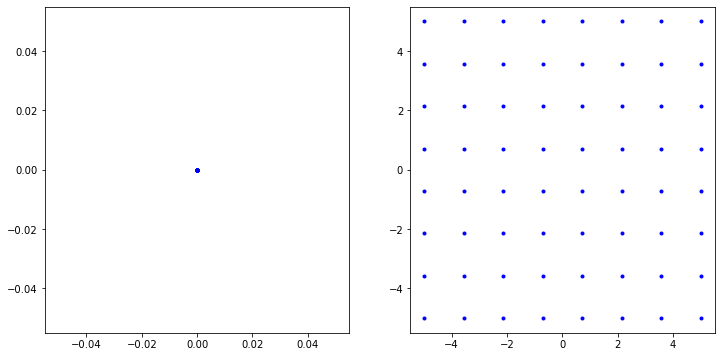

In [ ]:
xc = epsilon*np.cos(theta)
yc = epsilon*np.sin(theta)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(xc,yc,'b.');
plt.subplot(1,2,2)
plt.plot(X0,Y0,"b.");

<a id='Material_complementario'></a>
# Material Complementario

### Diferencia progresiva
se define como 
 
$$∆p_n = p_{n+1} - p_n, \quad \text{para}\quad n >= 0.$$

para potencia 2

$$
∆^2p_n = ∆(p_{n+1} − p_n)
       = p_{n+2} -2p_{n+1} +p_n,
$$

para potencias más altas

$$
∆^kp_n = ∆(∆^{k-1}p_n), \quad \text{para}\quad k \le 2.
$$

###  Diferencia regresiva
se define como:

$$ ∇p_n = p_n - p_{n−1}, \quad \text{para}\quad  n ≥ 1.$$

para potencias más altas

$$∇^kp_n = ∇(∇^{k−1}p_n), \quad \text{para}\quad  k \le 2.$$

Falta ....